# 2CSSID-TP01. Préparation de données

---

Dans ce TP, nous allons apprendre quelques méthodes de préparation de données.
Nous allons, premierement, implémenter quelques méthodes en utilisant numpy.
Ensuite, nous allons utiliser un API plus avancé pour apprendre dans quelle situation ses méthodes sont utilisées.

- **Binome 01** : Bourzag Mohamed Chakib
- **Binome 02** : Tirichine Mohammed
- **Groupe** : Il n'y a qu'un groupe => info inutile

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from typing import Tuple

## I. Réalisation des algorithmes

Cette partie sert à améliorer la compréhension des algorithmes de préparation de données vus en cours en les implémentant à partir de zéro. 
Pour ce faire, nous allons utiliser la bibliothèque numpy qui est utile dans les calcules surtout matricielles.

### I.1. Normalisation

Ici, nous allons réaliser les deux fonctions de nomalisation : standard et min-max.
Nous allons prendre une matrice $X[N, M]$ de $N$ échantillons et $M$ colonnes.
La normalisation standard d'une colonne $j$ peut être décrite comme : 
$$standard(X_j) = \frac{X_j - \mu(X_j)}{\sigma(X_j)}$$
La nomalisation min-max d'une colonne $j$ peut être décrite comme : 
$$minmax(X_j) = \frac{X_j - min(X_j)}{max(X_j) - min(X_j)}$$


In [3]:
# TODO: Standardisation d'une matrice
# Entrée : la matrice des données (N échantillons X  M caractéristiques)
# Sortie : vecteur de M moyennes, vecteur de M écart-types, une matrice normalisée
def norm_std(X: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    moy   = X.mean(axis=0)
    std   = X.std(axis=0)
    X_new = (X - moy)/std
    return moy, std, X_new


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# (array([4. , 3. , 0.5]),
#  array([1.87082869, 2.        , 0.5       ]),
#  array([[ 1.60356745,  1.        , -1.        ],
#         [-1.06904497, -1.        ,  1.        ],
#         [-0.53452248,  1.        , -1.        ],
#         [ 0.        , -1.        ,  1.        ]]))
#---------------------------------------------------------------------

X = np.array([
    [7, 5, 0],
    [2, 1, 1],
    [3, 5, 0],
    [4, 1, 1],
])

norm_std(X)

(array([4. , 3. , 0.5]),
 array([1.87082869, 2.        , 0.5       ]),
 array([[ 1.60356745,  1.        , -1.        ],
        [-1.06904497, -1.        ,  1.        ],
        [-0.53452248,  1.        , -1.        ],
        [ 0.        , -1.        ,  1.        ]]))

In [4]:
# TODO: Normalisation min-max d'une matrice
# Entrée : la matrice des données (N échantillons X  M caractéristiques)
# Sortie : vecteur de M max, vecteur de M min, une matrice normalisée
def norm_minmax(X: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    mx    = X.max(axis=0)
    mn    = X.min(axis=0)
    X_new = (X - mn) / (mx-mn)
    return mx, mn, X_new

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# (array([7, 5, 1]),
#  array([2, 1, 0]),
#  array([[1. , 1. , 0. ],
#         [0. , 0. , 1. ],
#         [0.2, 1. , 0. ],
#         [0.4, 0. , 1. ]]))
#---------------------------------------------------------------------

X = np.array([
    [7, 5, 0],
    [2, 1, 1],
    [3, 5, 0],
    [4, 1, 1],
])

norm_minmax(X)

(array([7, 5, 1]),
 array([2, 1, 0]),
 array([[1. , 1. , 0. ],
        [0. , 0. , 1. ],
        [0.2, 1. , 0. ],
        [0.4, 0. , 1. ]]))

### I.2. Encodage One-Hot

Etant donné un vecteur $A[N]$ représentant une caractéristique nominale donnée, on veut encoder les valeurs en utilisant One-Hot. Pour faciliter la tâche, on vous donne l'algorithme détaillé : 
1. Trouver les valeurs uniques dans le vecteur $A$ ; on appele ça : un vocabulaire $V$
1. Créer une matrice $X[N, |V|]$ en recopiant le vecteur $V$ $N$ fois. Dans python, on peut recopier un vecteur en utilisant l'instruction : [V] * N
1. Comparer l'égalité entre chaque ligne de $A$ et chaque ligne (qui est un vecteur) de $X$.
1. Transformer les booléens vers des entiers

In [5]:
# TODO: Encodage One-Hot
# Entrée : un vecteur d'une caractéristique (N échantillons)
# Sortie : vecteur du vocabulaire V, matrice N X |V|
def one_hot(A: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    V = np.unique(A)
    X = (np.array([V]*A.shape[0]) == A.reshape(-1,1)).astype(int)
    return V, X

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# (array(['COLD', 'HOT', 'MILD'], dtype='<U4'),
#  array([[0, 1, 0],
#         [0, 0, 1],
#         [1, 0, 0],
#         [0, 1, 0],
#         [0, 0, 1]]))
#---------------------------------------------------------------------

A = np.array(['HOT', 'MILD', 'COLD', 'HOT', 'MILD'])
one_hot(A)

(array(['COLD', 'HOT', 'MILD'], dtype='<U4'),
 array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]))

### I.3. Binarisation

Etant donné un vecteur $A[N]$ représentant une caractéristique numérique donnée, on veut encoder les valeurs en 0 ou 1 selon un seuil $s$.
La binarization d'un élément $A_i$ est donnée par :
$$A_i' = \begin{cases}
1 & \text{si } A_i \ge s\\
0 & \text{sinon}\\
\end{cases}$$

In [6]:
# TODO: Binarisation
# Entrée : un vecteur d'une caractéristique (N échantillons), un seuil de binarisation
# Sortie : un vecteur binarisé (N échantillons)
def bin(A: np.ndarray, seuil: float) -> np.ndarray:
    return (A >= seuil).astype(int)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# array([1, 0, 0, 0, 1, 1])
#---------------------------------------------------------------------

A = np.array([5, 2, 1, -1, 6, 4])

bin(A, 4)

array([1, 0, 0, 0, 1, 1])

### I.4. Analyse en composantes principales (ACP)

Algorithme:
1. Centrer et réduire les données (Standardisation) (X) pour avoir (X_std).
1. Calculer la matrice de covariance (X_cov) en se basant sur (X_std).
1. Calculer les valeurs propres (val_prop) et les vecteurs propres (vec_prop) de (X_cov). 
1. Ordonner les valeurs propres d'une maniere descendante et selon cette ordre, ordonner les vecteurs propres
1. Garder seulement les nbr_comp vecteurs propres premiers pour former le vecteur caracteristique (vec_car) 
1. Transformer les donnees $X\_reduit = (vec\_car^T \cdot X\_std^T)^T$

In [7]:
# TODO: ACP
# Entrée : la matrice des données (N échantillons X  M caractéristiques), nombre de composantes: nbr_comp
# Sortie : une matrice reduite (N échantillons X nbr_comp caractéristiques)
def ACP(X: 'np.array[M, N]', nbr_comp: int) -> 'np.array[M, nbr_comp]':
    
    # 1. Centrer et reduire les donnees
    X_std = norm_std(X)[2]
     
    # 2. matrice de covariance (X_cov)
    X_cov = np.cov(X_std, rowvar=False)
     
    # 3. valeurs propres et vecteurs propres
    val_prop, vec_prop = np.linalg.eigh(X_cov)   # Déjà générés ordonnés croissants
     
    # 4. Ordonner vec_prop selon l'ordre descendant de val_prop
    
    idx = np.argsort(val_prop)[::-1]
    vec_ord = vec_prop[:,idx]
     
    # 5. creer le vecteur caracteristique
    vec_car = vec_ord[:, :nbr_comp]
     
    # 6. Transformer les donnees
    X_reduit = np.matmul(X_std, vec_car)
     
    return X_reduit

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# array([[-2.00488333, -0.74288047],
#        [ 1.75181002,  0.27206396],
#        [-0.99259008,  1.14038556],
#        [ 1.24566339, -0.66956905]])
#---------------------------------------------------------------------

X = np.array([
    [7, 5, 0],
    [2, 1, 1],
    [3, 5, 0],
    [4, 1, 1],
])

ACP(X, 2)

array([[-2.00488333, -0.74288047],
       [ 1.75181002,  0.27206396],
       [-0.99259008,  1.14038556],
       [ 1.24566339, -0.66956905]])

## II. Application et analyse

Cette partie sert à appliquer les algorithmes, modifier les paramètres et analyser les résultats.

**Aucune programmation n'est demandee. Vous pouvez changer le code pour tester ou analyser les resultats sans executer**

### II.1. Lecture des données

Nous allons lire 4 fichiers : 
- un fichier CSV avec des colonnes séparées par des virgules ;
- un fichier CSV avec des colonnes séparées par des point-virgules ;
- un fichier Sqlite ;
- un fichier XML.

In [8]:
adult1 = pd.read_csv('data/adult1.csv', skipinitialspace=True)
print(len(adult1))
adult1.head(10)

50


,age,workclass,education,Marital-status,occupation,sex,Hours-per-week,class
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Male,40,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,13,<=50K
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Male,40,<=50K
3,53.0,Private,11th,NaN,Handlers-cleaners,Male,40,<=50K
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,40,<=50K
5,37.0,Private,Masters,Married-civ-spouse,Exec-managerial,Female,40,<=50K
6,49.0,Private,9th,Married-spouse-absent,Other-service,Female,16,<=50K
7,52.0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Male,45,>50K
8,31.0,Private,Masters,Never-married,Prof-specialty,Female,50,>50K
9,42.0,Private,Bachelors,Married-civ-spouse,Exec-managerial,Male,40,>50K


In [9]:
noms = ['class', 'age', 'sex', 'workclass', 'education', 'hours-per-week', 'marital-status']
adult2 = pd.read_csv('data/adult2.csv', skipinitialspace=True, sep=';', header=None, names=noms)
print(len(adult2))
adult2.head(10)

50


,class,age,sex,workclass,education,hours-per-week,marital-status
0,N,25,F,Private,Some-college,40,Married-civ-spouse
1,N,18,F,Private,HS-grad,30,Never-married
2,Y,47,F,"Private, Prof-school",60,Married-civ-spouse,NaN
3,Y,50,M,Federal-gov,Bachelors,55,Divorced
4,N,47,M,Self-emp-inc,HS-grad,60,Divorced
5,Y,43,M,Private,Some-college,40,Married-civ-spouse
6,N,46,M,Private,5th-6th,40,Married-civ-spouse
7,N,35,M,Private,Assoc-voc,40,Married-civ-spouse
8,N,41,M,Private,HS-grad,48,Married-civ-spouse
9,"N,30",M,"Private, HS-grad",40,Married-civ-spouse,NaN,NaN


In [10]:
import sqlite3
# établir la connexion avec la base de données
con = sqlite3.connect('data/adult3.db')
# récupérer le résultat d'une réquête SQL sur cette connexion
adult3 = pd.read_sql_query('SELECT * FROM income', con)

#remplacer les valeurs "?" par NaN de numpy
adult3 = adult3.replace('?', np.nan)

print(len(adult3))
adult3.head(10)

50


,num,age,workclass,education,marital-status,sex,hours-per-day,class
0,1,76,Private,Masters,married,M,8.0,Y
1,2,44,Private,Bachelors,married,M,12.0,Y
2,3,47,Self-emp-not-inc,Masters,single,F,10.0,N
3,4,20,Private,Some-college,single,F,8.0,N
4,5,29,Private,HS-grad,single,M,8.0,N
5,6,32,Self-emp-inc,HS-grad,married,M,8.0,Y
6,7,17,NaN,10th,single,F,6.4,N
7,8,30,Private,11th,single,M,8.0,N
8,9,31,Local-gov,HS-grad,single,F,8.0,N
9,10,42,Private,HS-grad,married,M,8.0,N


In [11]:
!pip install lxml

In [12]:
from lxml import etree

#créer le parser et spécifier qu'il doit valider le DTD
parser = etree.XMLParser(dtd_validation=True)

#analyser le fichier XML en utilisant ce parser
arbre = etree.parse('data/adult4.xml', parser)

def valeur_noeud(noeud):
    """Une fonction qui retourne np.nan si le texte du noeud est absent, sinon le texte lui-meme
    """
    return noeud.text if noeud is not None else np.nan


# Creer une table pandas vide afin de la remplir a partir des donnees XML
noms2 = ['id', 'age', 'workclass', 'education', 'marital-status', 'sex', 'hours-per-week', 'class']
adult4 = pd.DataFrame(columns=noms2)

# parcourir la structure arbre afin de la transformer a une table pandas
for candidat in arbre.getroot():
    idi       = candidat.get('id')
    age       = valeur_noeud(candidat.find('age')           )
    workclass = valeur_noeud(candidat.find('workclass')     )
    education = valeur_noeud(candidat.find('education')     )
    marital   = valeur_noeud(candidat.find('marital-status'))
    sex       = valeur_noeud(candidat.find('sex')           )
    hours     = valeur_noeud(candidat.find('hours-per-week'))
    klass     = valeur_noeud(candidat.find('class')         )

    adult4 = pd.concat([
        adult4, 
        pd.Series([idi, age, workclass, education, marital, sex, hours, klass],index=noms2).to_frame().T
        ], axis=0, ignore_index=True)

print(len(adult4))
adult4.head(10)

50


,id,age,workclass,education,marital-status,sex,hours-per-week,class
0,52,47,Local-gov,Some-college,divorced,F,38,N
1,53,34,Private,HS-grad,single,F,40,N
2,54,33,Private,Bachelors,single,F,40,N
3,55,21,Private,HS-grad,single,M,35,N
4,56,52,NaN,HS-grad,divorced,M,45,Y
5,57,48,Private,HS-grad,married,M,46,N
6,58,23,Private,Bachelors,single,M,40,N
7,59,71,Self-emp-not-inc,Some-college,divorced,M,2,N
8,60,29,Private,HS-grad,divorced,M,60,N
9,61,42,Private,Bachelors,divorced,M,50,N


**TODO: Analyse** 
- Que remarquez-vous concernant l'ordre, le nombre et les noms des caractéristiques dans les 4 datasets ?
- Que remarquez-vous à propos des valeurs des 4 tables ?

**Réponse**
- ... L'ordre est différent, de même pour le nom des caractéristiques mais leur nombre est le même 
- ... Les valeurs aussi sont différentes

### II.2. Intégration des données

Dans cette section, nous allons appliquer des opérations sur les différentes tables. 
Vous devez à chaque fois figurer l'operation et son utilite.

In [13]:
# Afficher les noms des colonnes de adult3
list(adult3.columns)

['num',
 'age',
 'workclass',
 'education',
 'marital-status',
 'sex',
 'hours-per-day',
 'class']

In [14]:
adult3.rename(columns={'num': 'id', 'hours-per-day': 'hours-per-week'}, inplace=True)
adult1.rename(columns={'Hours-per-week': 'hours-per-week', 'Marital-status': 'marital-status'}, inplace=True)

# Afficher les noms des colonnes de adult3
print(list(adult3.columns))
list(adult1.columns)

# Adult1 a l'attribut occupation en plus % aux autres et n'a pas id

['id', 'age', 'workclass', 'education', 'marital-status', 'sex', 'hours-per-week', 'class']


['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'sex',
 'hours-per-week',
 'class']

**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)
- Est-ce qu'en appliquant cette opération, nous aurons certains problèmes ?

**Réponse**
- ... On a fait une intégration des schémas
- ... C'est pour éviter le problème de nommage entre les données représentant le même attribut
- ... Non, cette opération ne cause pas de problèmes tant qu'une convention de nommage est définie

In [15]:
ordre = ['age', 'workclass', 'education', 'marital-status', 'sex', 'hours-per-week', 'class']
adult1 = adult1.reindex(ordre + ["occupation"], axis=1)
print (adult1.head())
adult2 = adult2.reindex(ordre, axis=1)
adult3 = adult3.reindex(ordre + ['id'], axis=1)
adult4 = adult4.reindex(ordre + ['id'], axis=1)

# Afficher les noms des colonnes de adult3
list(adult3.columns)

    age         workclass  education      marital-status     sex  \
0  39.0         State-gov  Bachelors       Never-married    Male   
1  50.0  Self-emp-not-inc  Bachelors  Married-civ-spouse    Male   
2  38.0           Private    HS-grad            Divorced    Male   
3  53.0           Private       11th                 NaN    Male   
4  28.0           Private  Bachelors  Married-civ-spouse  Female   

   hours-per-week  class         occupation  
0              40  <=50K       Adm-clerical  
1              13  <=50K    Exec-managerial  
2              40  <=50K  Handlers-cleaners  
3              40  <=50K  Handlers-cleaners  
4              40  <=50K     Prof-specialty  


['age',
 'workclass',
 'education',
 'marital-status',
 'sex',
 'hours-per-week',
 'class',
 'id']

**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Un réordonnancement unifrome entre les colonnes, tq l'ordre est le même et les colonnes en plus sont mises à la fin
- ... Pour assurer une bonne intégration entre les attributs des différentes tables de données

In [16]:
# Afficher les deux premières lignes de la table adult3
adult3.head(2)

,age,workclass,education,marital-status,sex,hours-per-week,class,id
0,76,Private,Masters,married,M,8.0,Y,1
1,44,Private,Bachelors,married,M,12.0,Y,2


In [17]:
adult3['hours-per-week'] *= 5

# Afficher les deux premières lignes de la table adult3
adult3.head(2)

,age,workclass,education,marital-status,sex,hours-per-week,class,id
0,76,Private,Masters,married,M,40.0,Y,1
1,44,Private,Bachelors,married,M,60.0,Y,2


**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Une unification d'échelle (de jours en semaines, *5 car on travaille 5 jours par semaine)
- ... Pour éviter les conflits de valeurs dûs aux échelles différentes

In [18]:
adult34 = pd.concat([adult3, adult4], ignore_index=True)
print(len(adult34))
adult34.head(10)

100


,age,workclass,education,marital-status,sex,hours-per-week,class,id
0,76,Private,Masters,married,M,40.0,Y,1
1,44,Private,Bachelors,married,M,60.0,Y,2
2,47,Self-emp-not-inc,Masters,single,F,50.0,N,3
3,20,Private,Some-college,single,F,40.0,N,4
4,29,Private,HS-grad,single,M,40.0,N,5
5,32,Self-emp-inc,HS-grad,married,M,40.0,Y,6
6,17,NaN,10th,single,F,32.0,N,7
7,30,Private,11th,single,M,40.0,N,8
8,31,Local-gov,HS-grad,single,F,40.0,N,9
9,42,Private,HS-grad,married,M,40.0,N,10


**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Intégration des données des deux tables adult3 et adult4 (combinaison entre leurs contenus)
- ... Agrandire la taille du dataset

In [19]:
# Transformer le champs "id" à un entier
adult34['id'] = pd.to_numeric(adult34['id'], downcast='integer')
# Ordonner la table en se basant sur les valeurs de "id"
adult34 = adult34.sort_values(by='id')

# L'opération que vous devez deviner (une opération de vérification)
red = adult34[adult34.duplicated('id', keep=False)]  # False pour garder toutes les instances redondantes selon 'id', ou 'first' ou 'last'
print(len(red))
red

12


,age,workclass,education,marital-status,sex,hours-per-week,class,id
44,70,Private,Some-college,single,M,40.0,N,45
94,70,Private,Some-college,single,M,8,N,45
45,31,Private,HS-grad,single,F,30.0,N,46
95,31,Private,HS-grad,single,NaN,6,N,46
46,22,Private,Some-college,married,M,24.0,N,47
96,22,Private,Some-college,married,M,4.8,N,47
47,36,Private,HS-grad,widowed,F,24.0,N,48
97,NaN,Private,HS-grad,widowed,F,4.8,N,48
48,64,Private,11th,married,M,40.0,N,49
98,64,Private,11th,married,M,8,N,49


**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Une opération de tri et de filtrage des données dupliquées -> gestion de la redondance
- ... Pour trouver les valeurs redondantes et les traiter

In [20]:
# Il y a un problème avec cette forme
# en attendant qu'il soit réglé
#adult34 = adult34.groupby("id").ffill()

adult34.update(adult34.groupby(['id']).ffill())   # Forward FILL dans le cas où le suivant manque
adult34.update(adult34.groupby(['id']).bfill())   # Backward FILL dans le cas où le précédent manque

# L'opération de vérification précédente
red = adult34[adult34.duplicated('id', keep=False)]
red

,age,workclass,education,marital-status,sex,hours-per-week,class,id
44,70,Private,Some-college,single,M,40.0,N,45
94,70,Private,Some-college,single,M,8,N,45
45,31,Private,HS-grad,single,F,30.0,N,46
95,31,Private,HS-grad,single,F,6,N,46
46,22,Private,Some-college,married,M,24.0,N,47
96,22,Private,Some-college,married,M,4.8,N,47
47,36,Private,HS-grad,widowed,F,24.0,N,48
97,36,Private,HS-grad,widowed,F,4.8,N,48
48,64,Private,11th,married,M,40.0,N,49
98,64,Private,11th,married,M,8,N,49


**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Inférer les données manquantes dans des instances redondantes selon 'id'
- ... Pour combler les vides (Nan..) dans le dataset d'une manière certaine ici vu que ce sont des données redondantes

In [21]:
adult34.drop_duplicates('id', keep='last', inplace=True)  # inplace means to modify the dataframe rathen than creating a new one

# On refait la même opération précédente
red = adult34[adult34.duplicated('id', keep=False)]
red

,age,workclass,education,marital-status,sex,hours-per-week,class,id


**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... On a éliminé les dernières instances redondantes
- ... Pour nettoyer le dataset des instances redondantes en assumant que la dernière instance est la plus adéquate

In [22]:
list(adult1.columns)

['age',
 'workclass',
 'education',
 'marital-status',
 'sex',
 'hours-per-week',
 'class',
 'occupation']

In [23]:
adult1 .drop(['occupation'], axis=1, inplace=True)
adult34.drop(['id'        ], axis=1, inplace=True)

list(adult1.columns)

['age',
 'workclass',
 'education',
 'marital-status',
 'sex',
 'hours-per-week',
 'class']

**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Eliminer les colonnes différentes entre les tableaux
- ... Pour pouvoir les intégrer par la suite avec un schéma uniforme

In [24]:
# les différentes valeurs du colonne adult1.marital-status
adult1['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced', nan,
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse'],
      dtype=object)

In [25]:
dic = {
    'Never-married'        : 'single'  ,
    'Married-civ-spouse'   : 'married' ,
    'Married-spouse-absent': 'married' ,
    'Married-AF-spouse'    : 'married' ,
    'Divorced'             : 'divorced',
    'Separated'            : 'divorced',
    'Widowed'              : 'widowed'
}

adult1['marital-status'] = adult1['marital-status'].map(dic)
adult2['marital-status'] = adult2['marital-status'].map(dic)

# les différentes valeurs du colonne adult1.marital-status après mappage
adult1['marital-status'].unique()

array(['single', 'married', 'divorced', nan], dtype=object)

**TODO: Analyse** 
- Quelle opération avons-nous appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Transformer les valeurs en leurs équivalents dans adult34
- ... Pour éviter les conflits entre les valeurs

In [26]:
# On va appliquer la même opération sur d'autres caractéristiques
adult1['sex'  ] = adult1['sex'  ].map({"Female": "F", "Male": "M"})
adult1['class'] = adult1['class'].map({"<=50K": "N", ">50K": "Y"})

# Ensuite, on fusionne les tables dans une seule
adult = pd.concat([adult1, adult2, adult34], ignore_index=True)

# dimension de la table adult
print(list(adult.columns))
adult.shape

['age', 'workclass', 'education', 'marital-status', 'sex', 'hours-per-week', 'class']


(194, 7)

### II.3. Nétoyage des données

Ici, on va appliquer des opérations de nétoyage. C'est à vous de déviner quelle opération a-t-on utilisé et pourqoi.


In [27]:
# Afficher le nombre des valeurs nulles dans chaque colonne
adult.isnull().sum()

age                5
workclass         10
education          1
marital-status     4
sex                2
hours-per-week     2
class              0
dtype: int64

In [28]:
adult.dropna(subset=["workclass", "education", "marital-status", "sex", "hours-per-week", "class"], inplace=True)
adult.isnull().sum()

age               3
workclass         0
education         0
marital-status    0
sex               0
hours-per-week    0
class             0
dtype: int64

**TODO: Analyse** 
- Quelle opération a-t-on appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Ignorer les tuples contenant des valeurs Nan pour toutes les colonnes sauf age
- ... Pour avoir des données plus complètes

In [29]:
adult["age"] = pd.to_numeric(adult["age"])
adult["age"] = adult.groupby(["class", "education"])["age"].transform(lambda x: x.fillna(int(round(x.mean()))))
adult.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
sex               0
hours-per-week    0
class             0
dtype: int64

**TODO: Analyse** 
- Quelle opération a-t-on appliqué ?
- Pourquoi ? (Quel est l'intérêt ?)

**Réponse**
- ... Compléter les valeurs manquantes par la moyenne selon des groupes de "class" et "education"
- ... Trouver une valeur adéquate pour chaque valeur manquante pour compléter le dataset

### II.4. Transformation des données

In [30]:
adult["education"].head(6)

0    Bachelors
1    Bachelors
2      HS-grad
4    Bachelors
5      Masters
6          9th
Name: education, dtype: object

In [46]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
# le résultat c'est un numpy.ndarray
education_enc = ord_enc.fit_transform(adult[["education"]])
education_enc[:6,]

array([[6.],
       [6.],
       [8.],
       [6.],
       [9.],
       [3.]])

**TODO: Analyse** 
- Quel est le type d'encodage utilisé ?
- A votre avis, dans quel cas peut-on utiliser ce type d'encodage ?

**Réponse**
- ... Encodage ordinal
- ... Quand l'ordre des catégories est important

In [32]:
adult["sex"].head(6)

0    M
1    M
2    M
4    F
5    F
6    F
Name: sex, dtype: object

In [33]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder()
# le résultat c'est un numpy.ndarray
sex_enc = onehot_enc.fit_transform(adult[["sex"]])
sex_enc.toarray()[:6,]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

**TODO: Analyse** 
- Quel est le type d'encodage utilisé ?
- A votre avis, dans quel cas peut-on utiliser ce type d'encodage ?

**Réponse**
- ... Encodage One-Hot
- ... Lorsque les catégories ont le même degré d'importance

In [34]:
adult["hours-per-week"] = pd.to_numeric(adult["hours-per-week"])
adult["hours-per-week"].head(3)

0    40.0
1    13.0
2    40.0
Name: hours-per-week, dtype: float64

In [35]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
# le résultat c'est un numpy.ndarray
hours_per_week_prop = min_max_scaler.fit_transform(adult[["hours-per-week"]])
hours_per_week_prop[:3,]

array([[0.49367089],
       [0.15189873],
       [0.49367089]])

In [36]:
# pour ajouter la nouvelle caractéristique au dataframe
adult["hours-per-week-prop"] = hours_per_week_prop
adult.head(3)

,age,workclass,education,marital-status,sex,hours-per-week,class,hours-per-week-prop
0,39.0,State-gov,Bachelors,single,M,40.0,N,0.493671
1,50.0,Self-emp-not-inc,Bachelors,married,M,13.0,N,0.151899
2,38.0,Private,HS-grad,divorced,M,40.0,N,0.493671


**TODO: Analyse** 
- Comment la normalisation MinMax est calculée ?
- Décrire les valeurs résultats (plage de valeurs, etc.) ?
- Est-ce que les valeurs du dataset de test sont garanties d'être dans la plage ?
- Si oui, expliquer pouruoi. Si non, comment garantir la plage des valeurs ?

**Réponse**
- ... (x-min)/(max-min)
- ... Les valeurs sont entre 0 et 1
- ... Pas forcément dans le cas où on teste dans un autre dataset où les min et max seraient différents
- ... En forçant les valeurs € [min, max] tq (valeur < min) => valeur = min, (valeur > max) => valeur = max

In [37]:
adult["age"].head(3)

0    39.0
1    50.0
2    38.0
Name: age, dtype: float64

In [49]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
# le résultat c'est un numpy.ndarray
age_normal = min_max_scaler.fit_transform(adult[["age"]])
age_normal[:10,]

array([[0.3442623 ],
       [0.52459016],
       [0.32786885],
       [0.16393443],
       [0.31147541],
       [0.50819672],
       [0.55737705],
       [0.21311475],
       [0.39344262],
       [0.40983607]])

**TODO: Analyse** 
- Comment la normalisation standard est calculée ?
- Décrire les valeurs résultats (plage de valeurs, etc.) ?

**Réponse**
- ... $$standard(X_j) = \frac{X_j - \mu(X_j)}{\sigma(X_j)}$$
- ... Les valeurs sont entre 0 et 1 (car âge est > 0)

In [39]:
adult["age"].head(10)

0     39.0
1     50.0
2     38.0
4     28.0
5     37.0
6     49.0
7     52.0
8     31.0
9     42.0
10    43.0
Name: age, dtype: float64

In [54]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=40)
# le résultat c'est un numpy.ndarray
age_bin = binarizer.fit_transform(adult[["age"]])
age_bin[:10,]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

**TODO: Analyse** 
- Quelle est l'opération appliquée ici ?
- Quel est son rôle ?

**Réponse**
- ... Opération de binarisation
- ... Placer les valeurs >= 40 comme étant 1, les autres 0

### II.5. ACP

Ici, nous allons appliquer l'ACP sur nos donnees. Mais avant ca, nous avons applique quelques operations.

In [41]:
# Transformer les attributs 
adult_num = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'sex'])
# Repositionner la classe pour etre en premier
adult_num.insert(0, 'class', adult_num.pop('class'))
# Nous n'avons pas besoin de ca ici
adult_num.pop('hours-per-week-prop') 
adult_num.head()

,class,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_11th,...,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital-status_divorced,marital-status_married,marital-status_single,marital-status_widowed,sex_F,sex_M
0,N,39.0,40.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,N,50.0,13.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,N,38.0,40.0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,N,28.0,40.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,N,37.0,40.0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


**TODO: Analyse** 
- Pourquoi nous avons transforme les caracteristiques : 'workclass', 'education', 'marital-status', 'sex' ?
- Pourquoi nous avons supprime la carcteristique 'hours-per-week-prop' ?

**Réponse**
- ... Car ce sont des données qualitatives et donc on peut pas appliquer l'ACP dessus
- ... C'est une information redondante

In [51]:
from sklearn.decomposition import PCA

pca_adult = PCA(n_components=2)

adult_pca = pca_adult.fit_transform(adult_num.iloc[:, 1:].values)

adult_pca[:5, :]

array([[ 0.90589486, -1.05874639],
       [26.18987797, 13.46056046],
       [ 0.12921225, -0.450828  ],
       [-7.75501444,  5.68754065],
       [-0.65016966,  0.16407329]])

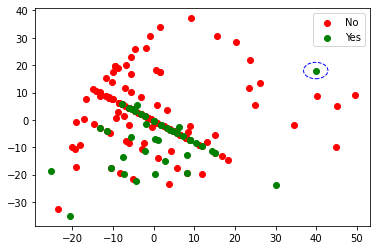

In [43]:
# Extraire la collone 'class' qui est en premier
Y = adult_num.iloc[:, 0].values
# Trouver les echantillons ayant la class 'N', 
# la negation est les echantillons ayant la class 'Y' (classement binaire)
No_class = Y == 'N'
# Ploter les echantillons selon les deux composantes
plt.scatter(adult_pca[ No_class,0], adult_pca[ No_class, 1], color='red'  , label='No' )
plt.scatter(adult_pca[~No_class,0], adult_pca[~No_class, 1], color='green', label='Yes')

circle1 = plt.Circle((39.87348226,  18.02549656), 3, color='b', fill=False, ls='--')
ax = plt.gca()
ax.add_patch(circle1)

plt.legend(loc='upper right')
plt.show()

**TODO: Analyse** 
- Pour quel but nous avons utilise l'ACP ?
- Que pouvons-nous dire a propos de l'echantillon en vert dans les environs de [40, 18] ?
- Quelle est la classe la plus homogene ? 
- Pourquoi ?

**Réponse**
- ... Pour réduire la dimensionnalité et bien pouvoir visualiser
- ... C'est un échantillon parlant
- ... La plus homogène c'est la classe des 'N'
- ... Car la plupart les points sont rapprochés entre eux

In [44]:
print('Luck is overrated')
print('BUT')
print('Good luck anayways')

Luck is overrated
BUT
Good luck anayways
